In [425]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


# Assignment by Group 3

# 1. Get the data
# 2. Explore the data to gain insights
# 3. Prepare the data to better expose the underlying data patterns to machine learning algorithms
# 4. Exploring different models
# 5. Fine-tune your models and combine them into a great solution
# 6. Present your solution


In [426]:
# Imports
import numpy as np
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import sklearn
import warnings
from math import sin, cos, sqrt, atan2, radians

warnings.filterwarnings("ignore")

# Settings
import matplotlib


In [427]:
# To make the notebook reproducible
seed = 42
np.random.seed(seed)

# 1. Get the Data

In [428]:

# Read data
train_data = pd.read_csv('../input/nyc-taxi-trip-duration/train.zip')



# 2. Explore the data to gain insights

In [429]:
# View data
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


In [430]:

# Statistical summary
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.000,1.535,0.499,1.000,1.000,2.000,2.000,2.000
passenger_count,1458644.000,1.665,1.314,0.000,1.000,1.000,2.000,9.000
pickup_longitude,1458644.000,-73.973,0.071,-121.933,-73.992,-73.982,-73.967,-61.336
pickup_latitude,1458644.000,40.751,0.033,34.360,40.737,40.754,40.768,51.881
dropoff_longitude,1458644.000,-73.973,0.071,-121.933,-73.991,-73.980,-73.963,-61.336
dropoff_latitude,1458644.000,40.752,0.036,32.181,40.736,40.755,40.770,43.921
trip_duration,1458644.000,959.492,5237.432,1.000,397.000,662.000,1075.000,3526282.000


In [431]:
# Data Shape
print('Data Shape',train_data.shape)
train_data.info


Data Shape (1458644, 11)


<bound method DataFrame.info of                 id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0   

In [432]:
##  deleting outliers 
train_data = train_data[train_data['passenger_count']>0]
train_data = train_data[train_data['passenger_count']<9]

# Remove trip_duration outliers
trip_duration_mean = np.mean(train_data['trip_duration'])
trip_duration_std = np.std(train_data['trip_duration'])
train_data = train_data[train_data['trip_duration']<=trip_duration_mean + 2*trip_duration_std]
train_data = train_data[train_data['trip_duration']>= trip_duration_mean - 2*trip_duration_std]

# Confirm removal
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vendor_id,1456480.000,1.534,0.499,1.000,1.000,2.000,2.000,2.000
passenger_count,1456480.000,1.664,1.314,1.000,1.000,1.000,2.000,8.000
pickup_longitude,1456480.000,-73.973,0.071,-121.933,-73.992,-73.982,-73.967,-61.336
pickup_latitude,1456480.000,40.751,0.033,34.360,40.737,40.754,40.768,51.881
dropoff_longitude,1456480.000,-73.973,0.071,-121.933,-73.991,-73.980,-73.963,-61.336
dropoff_latitude,1456480.000,40.752,0.036,32.181,40.736,40.755,40.770,43.921
trip_duration,1456480.000,836.880,658.920,1.000,397.000,662.000,1073.000,11411.000


In [433]:
# Convert timestamps to date objects
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime) # Pickups
train_data['dropoff_datetime'] = pd.to_datetime(train_data.dropoff_datetime) # Drop-offs

# Confirm changes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456480 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1456480 non-null  object        
 1   vendor_id           1456480 non-null  int64         
 2   pickup_datetime     1456480 non-null  datetime64[ns]
 3   dropoff_datetime    1456480 non-null  datetime64[ns]
 4   passenger_count     1456480 non-null  int64         
 5   pickup_longitude    1456480 non-null  float64       
 6   pickup_latitude     1456480 non-null  float64       
 7   dropoff_longitude   1456480 non-null  float64       
 8   dropoff_latitude    1456480 non-null  float64       
 9   store_and_fwd_flag  1456480 non-null  object        
 10  trip_duration       1456480 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 133.3+ MB


#  4. Prepare the data to better expose the underlying data patterns to machine learning algorithms

In [434]:
train_data['pickup_date']= train_data['pickup_datetime'].dt.date
train_data['pickup_day']=train_data['pickup_datetime'].apply(lambda x:x.day)
train_data['pickup_hour']=train_data['pickup_datetime'].apply(lambda x:x.hour)
train_data['pickup_day_of_week']=train_data['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_data['pickup_month'] = train_data['pickup_datetime'].dt.month # Extract month

train_data['dropoff_date']= train_data['dropoff_datetime'].dt.date
train_data['dropoff_day']=train_data['dropoff_datetime'].apply(lambda x:x.day)
train_data['dropoff_hour']=train_data['dropoff_datetime'].apply(lambda x:x.hour)
train_data['dropoff_month'] = train_data['dropoff_datetime'].dt.month # Extract month
train_data['pickup_day_of_week'] = train_data['pickup_datetime'].dt.dayofweek # extract day of week
train_data['dropoff_day_of_week'] = train_data['dropoff_datetime'].dt.dayofweek # Extract day of week



In [435]:

# Confirm changes
train_data.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_day', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month', 'dropoff_date', 'dropoff_day',
       'dropoff_hour', 'dropoff_month', 'dropoff_day_of_week'],
      dtype='object')

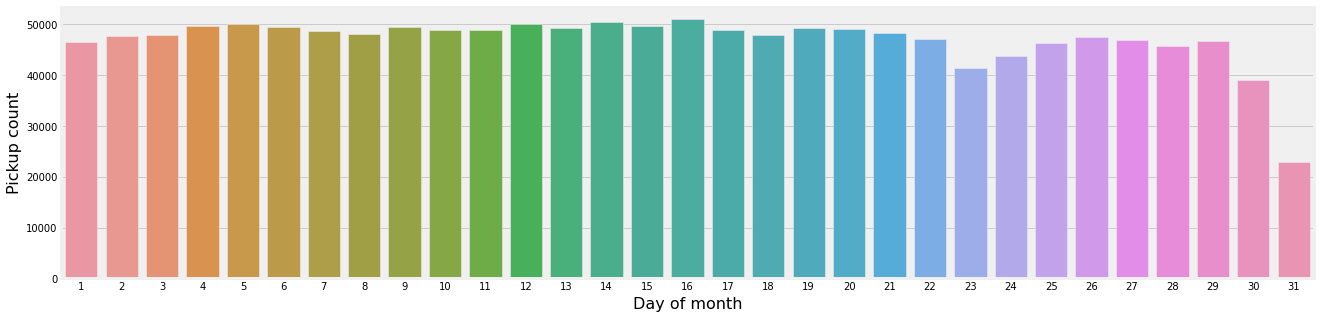

In [436]:
f = plt.figure(figsize=(20,5))
sns.countplot(x='pickup_day', data=train_data)
plt.xlabel('Day of month', fontsize=16)
plt.ylabel('Pickup count', fontsize=16)
plt.show()

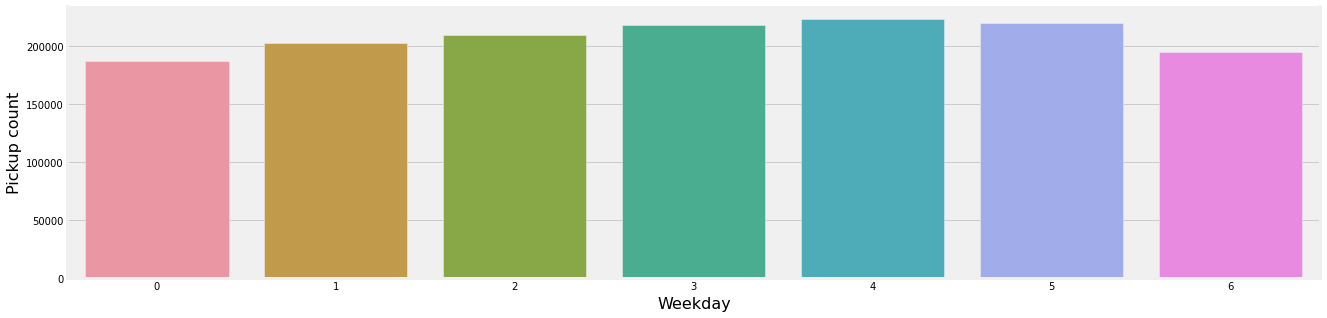

In [437]:
# Distribution of pickups over the day of week
f = plt.figure(figsize=(20,5))
sns.countplot(x='pickup_day_of_week', data=train_data)
plt.xlabel('Weekday', fontsize=16)
plt.ylabel('Pickup count', fontsize=16)
plt.show()

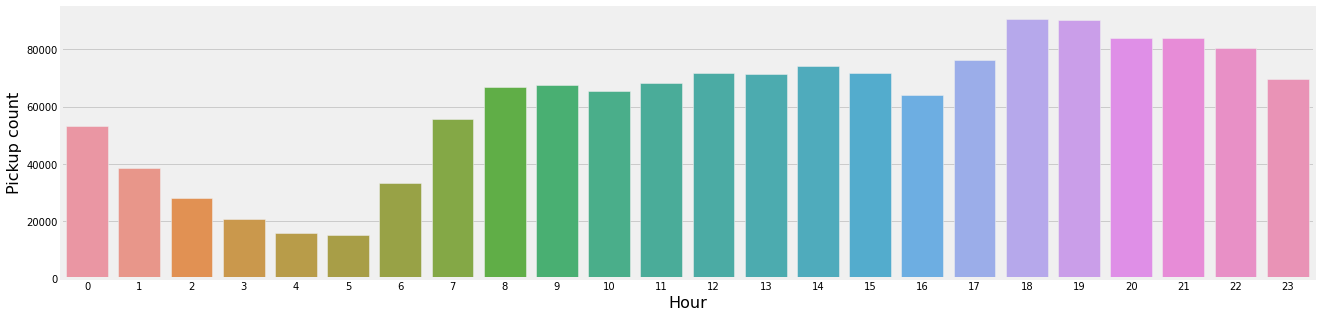

In [438]:
f = plt.figure(figsize=(20,5))
sns.countplot(x='pickup_hour', data=train_data)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Pickup count', fontsize=16)
plt.show()

In [439]:
# Exploring pickup and dropoff - longitude and latitude

train_data['pickup_latitude_round'] = train_data['pickup_latitude'].apply(lambda x : round(x, 2))
train_data['pickup_longitude_round'] = train_data['pickup_longitude'].apply(lambda x : round(x, 2))

train_data['dropoff_latitude_round'] = train_data['dropoff_latitude'].apply(lambda x : round(x, 2))
train_data['dropoff_longitude_round'] = train_data['pickup_longitude'].apply(lambda x : round(x, 2))

pickup = train_data.groupby(['pickup_latitude_round','pickup_longitude_round'])['id'].count().reset_index().rename(columns={'id':'Num_Trips'})
dropoff = train_data.groupby(['dropoff_latitude_round','dropoff_longitude_round'])['id'].count().reset_index().rename(columns={'id':'Num_Trips'})

In [440]:
import folium
from folium.plugins import HeatMap

# Setting up new york coordinates
pickup_map = folium.Map(location = [40.730610,-73.935242], zoom_start = 10)

heatmap = HeatMap(list(zip(pickup.pickup_latitude_round.values, 
                           pickup.pickup_longitude_round.values,
                           pickup.Num_Trips.values.astype(float))),
                  min_opacity = 0.3,
                  radius = 5, blur = 10,
                  max_zoom = 1)

pickup_map.add_child(heatmap)

pickup_map

In [441]:
heatmap = HeatMap(list(zip(dropoff.dropoff_latitude_round.values, 
                           dropoff.dropoff_longitude_round.values,
                           dropoff.Num_Trips.values.astype(float))),
                  min_opacity = 0.3,
                  radius = 5, blur = 10,
                  max_zoom = 1)

pickup_map.add_child(heatmap)

pickup_map

In [442]:
def calculateDistance(row):
    R=6373.0 # approximate radius of earth in km
    pickup_lat=radians(row['pickup_latitude'])
    pickup_lon=radians(row['pickup_longitude'])
    dropoff_lat=radians(row['dropoff_latitude'])
    dropoff_lon=radians(row['dropoff_longitude'])
    dlon = dropoff_lon - pickup_lon
    dlat = dropoff_lat - pickup_lat
    a = sin(dlat / 2)**2 + cos(pickup_lat) * cos(dropoff_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [443]:
train_data['trip_distance']=train_data.apply(lambda row:calculateDistance(row),axis=1)
train_data['trip_duration_in_hour']=train_data['trip_duration'].apply(lambda x:x/3600)

In [444]:
train_data['avg_speed_kph']=train_data['trip_distance']/train_data['trip_duration_in_hour']

Text(0.5, 1.0, 'Avg Speed (kph) vs Pickup Days of Week')

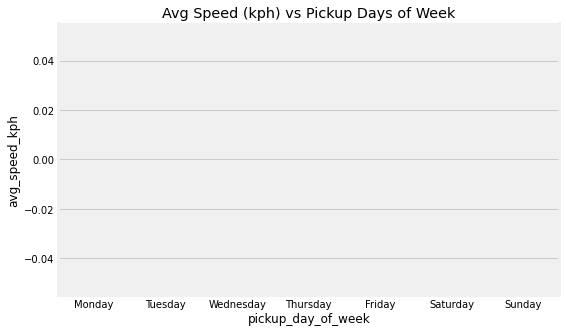

In [445]:
avg_speed_per_day=train_data.groupby(['pickup_day_of_week'])['avg_speed_kph'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='pickup_day_of_week',y='avg_speed_kph',data=avg_speed_per_day,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']).set_title("Avg Speed (kph) vs Pickup Days of Week")

In [446]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456480 entries, 0 to 1458643
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   id                       1456480 non-null  object        
 1   vendor_id                1456480 non-null  int64         
 2   pickup_datetime          1456480 non-null  datetime64[ns]
 3   dropoff_datetime         1456480 non-null  datetime64[ns]
 4   passenger_count          1456480 non-null  int64         
 5   pickup_longitude         1456480 non-null  float64       
 6   pickup_latitude          1456480 non-null  float64       
 7   dropoff_longitude        1456480 non-null  float64       
 8   dropoff_latitude         1456480 non-null  float64       
 9   store_and_fwd_flag       1456480 non-null  object        
 10  trip_duration            1456480 non-null  int64         
 11  pickup_date              1456480 non-null  object        
 12  

In [447]:
# Split
# Create matrix of features
X = train_data[['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'pickup_month', 'pickup_hour',
       'pickup_day_of_week','avg_speed_kph']] # double brackets!

# Create array of target variable 
y = train_data['trip_duration']

# Create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 4. Exploring different machine learning models

In [448]:
#  Import model
from sklearn.linear_model import LinearRegression

#  set model 
lreg = LinearRegression()

# Fit to training data
lreg.fit(X_train,y_train)
print(lreg)

# Predict
y_pred_lreg = lreg.predict(X_test)

# Score It
from sklearn import metrics
print('Linear Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred_lreg))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_lreg))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lreg)))

LinearRegression()
Linear Regression Performance Metrics
R^2= 0.05623906297446979
MAE: 442.8540610847911
MSE: 413762.0727298956
RMSE: 643.2434008444203


# 5. Fine-tune your models and combine them into a great solution

In [449]:
# Fit 
# Import model
from sklearn.ensemble import RandomForestRegressor 

# set model
rforest = RandomForestRegressor(n_estimators = 20, n_jobs = -1, random_state=42)

# Fit to training data
rforest = rforest.fit(X_train,y_train)
print(rforest)

# Predict
y_pred_rforest = rforest.predict(X_test)

# Score It
from sklearn import metrics
print('\nRandom Forest Regression Performance Metrics')
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))
print('MAE',metrics.mean_absolute_error(y_test, y_pred_rforest))
print('MSE',metrics.mean_squared_error(y_test, y_pred_rforest))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))

RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=42)

Random Forest Regression Performance Metrics
R^2 = 0.9608726764560644
MAE 56.140230018034345
MSE 17172.365549392096
RMSE 131.04337277936682


In [450]:
# Load test data
test_data = pd.read_csv('../input/nyc-taxi-trip-duration/train.zip')

# Test data info
test_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# feature engineering

In [451]:
##  deleting outliers 
test_data = test_data[test_data['passenger_count']>0] # outliers negative guests
test_data = test_data[test_data['passenger_count']<9] # outliers more than 9

# Remove trip_duration outliers
trip_duration_mean = np.mean(test_data['trip_duration'])
trip_duration_std = np.std(test_data['trip_duration'])
test_data = test_data[test_data['trip_duration']<=trip_duration_mean + 2*trip_duration_std]
test_data = test_data[test_data['trip_duration']>= trip_duration_mean - 2*trip_duration_std]  # limit the deviation
 
# Convert timestamps to date objects
test_data['pickup_datetime'] = pd.to_datetime(test_data.pickup_datetime) # convert to date objects
test_data['dropoff_datetime'] = pd.to_datetime(test_data.dropoff_datetime) # convert to date objects 



test_data['pickup_date']= test_data['pickup_datetime'].dt.date    # extract date 
test_data['pickup_day']=test_data['pickup_datetime'].apply(lambda x:x.day) # extract day
test_data['pickup_hour']=test_data['pickup_datetime'].apply(lambda x:x.hour) # extract hour
test_data['pickup_day_of_week']=test_data['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()]) # extract day of week (1-7)
test_data['pickup_month'] = test_data['pickup_datetime'].dt.month # Extract month

test_data['dropoff_date']= test_data['dropoff_datetime'].dt.date
test_data['dropoff_day']=test_data['dropoff_datetime'].apply(lambda x:x.day)
test_data['dropoff_hour']=test_data['dropoff_datetime'].apply(lambda x:x.hour)
test_data['dropoff_month'] = test_data['dropoff_datetime'].dt.month # Extract month
test_data['pickup_day_of_week'] = test_data['pickup_datetime'].dt.dayofweek # Extract day of week
test_data['dropoff_day_of_week'] = test_data['dropoff_datetime'].dt.dayofweek # Extract day of week
test_data['trip_distance']=test_data.apply(lambda row:calculateDistance(row),axis=1)
test_data['trip_duration_in_hour']=test_data['trip_duration'].apply(lambda x:x/3600)
test_data['avg_speed_kph']=test_data['trip_distance']/test_data['trip_duration_in_hour']

In [452]:
# Test data info
test_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456480 entries, 0 to 1458643
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1456480 non-null  object        
 1   vendor_id              1456480 non-null  int64         
 2   pickup_datetime        1456480 non-null  datetime64[ns]
 3   dropoff_datetime       1456480 non-null  datetime64[ns]
 4   passenger_count        1456480 non-null  int64         
 5   pickup_longitude       1456480 non-null  float64       
 6   pickup_latitude        1456480 non-null  float64       
 7   dropoff_longitude      1456480 non-null  float64       
 8   dropoff_latitude       1456480 non-null  float64       
 9   store_and_fwd_flag     1456480 non-null  object        
 10  trip_duration          1456480 non-null  int64         
 11  pickup_date            1456480 non-null  object        
 12  pickup_day             14564

# 6. Solutions

In [453]:
# Create new matrix of features from test data
X_test = train_data[['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'pickup_month', 'pickup_hour',
       'pickup_day_of_week','avg_speed_kph']]


# Feed features into random forest
y_pred= rforest.predict(X_test)

print(y_pred)


[ 459.4   691.65 2081.65 ...  767.55  369.4   204.  ]
